# Laboratorio #4: Procesamiento de Imágenes a Color (Parte II)

## 2. Procesamiento Básico de Imágenes a Color

 1. Cargar la imagen a color (belka-strelka.png) en el entorno de trabajo en formato de arreglo de Numpy. Mostrar la
 imagen a color cargada.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

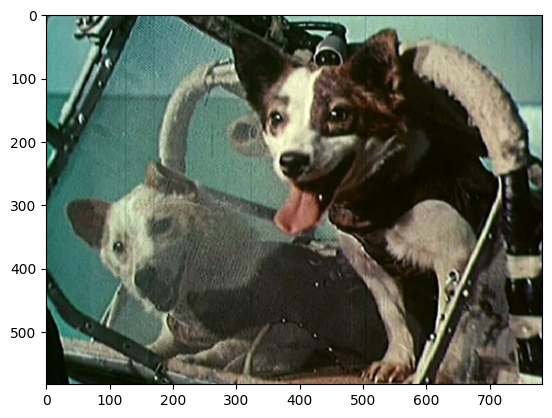

In [2]:
belka_strelka= Image.open('belka-strelka.png')
belka_strelka_np=np.array(belka_strelka)

plt.imshow(belka_strelka_np)
plt.show()

2. Mostrar las bandas de color individuales (Rojo, Verde y Azul). Utilizar subfiguras (plt.subplot()) para visualizar cada
 canal en escala de grises, representando la intensidad de cada canal.

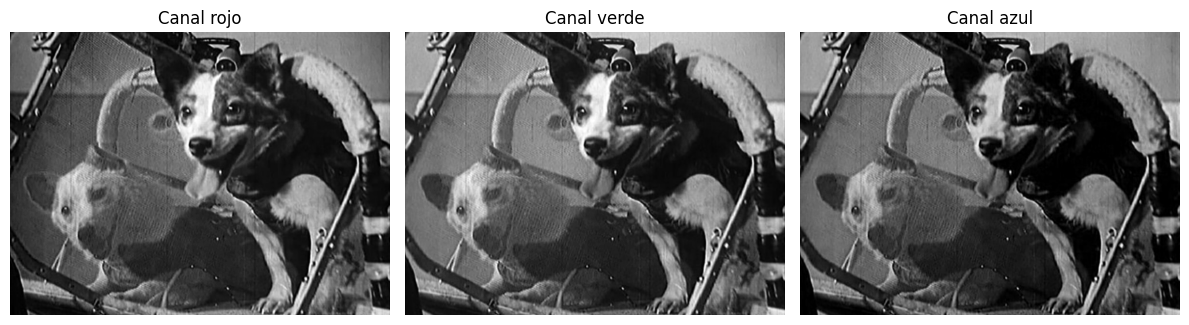

In [3]:
rojo= belka_strelka_np[:, :, 0]
verde= belka_strelka_np[:, :, 1]
azul= belka_strelka_np[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(rojo, cmap='gray')
plt.title('Canal rojo')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(verde, cmap='gray')
plt.title('Canal verde')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(azul, cmap='gray')
plt.title('Canal azul')
plt.axis('off')

plt.tight_layout()
plt.show()

 3. Crear una nueva imagen RGB intercambiando los canales rojo y azul de la imagen original. Mostrar la nueva imagen al
 lado de la imagen original para comparar visualmente los efectos del intercambio de canales. Comente sus observaciones
 sobre las diferencias observadas.

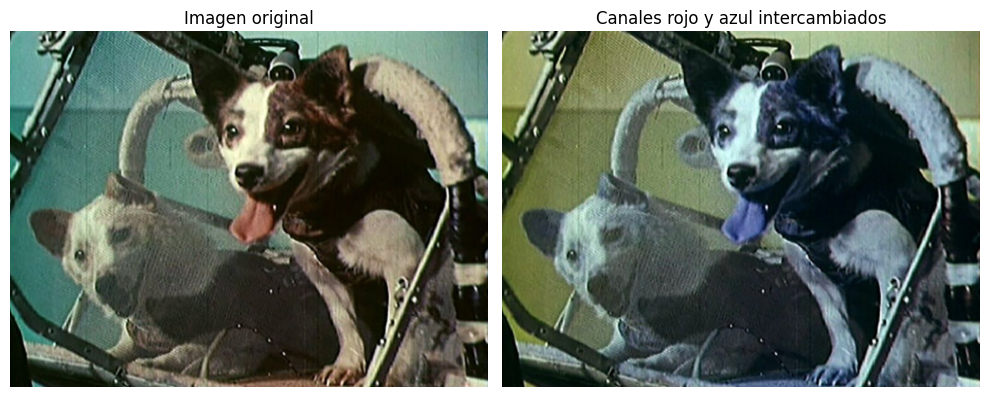

In [4]:
intercambio_r_a = belka_strelka_np.copy()
intercambio_r_a[:, :, 0]=belka_strelka_np[:, :, 2]
intercambio_r_a[:, :, 2]=belka_strelka_np[:, :, 0]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(intercambio_r_a)
plt.title('Canales rojo y azul intercambiados')
plt.axis('off')

plt.tight_layout()
plt.show()

* se puede observar como las partes de la imagen que antes eran azules ahora son rojas y como las que antes eran rojas ahora son azules y como las combinaciones que antes eran rojo-verde y azul-verde cambiaron de color.

4. En la imagen original, reemplazar el canal Azul con un arreglo completamente lleno de valores 255. Utilizar. Graficar la
 nueva imagen RGB y discutir sus observaciones resultantes de este cambio.

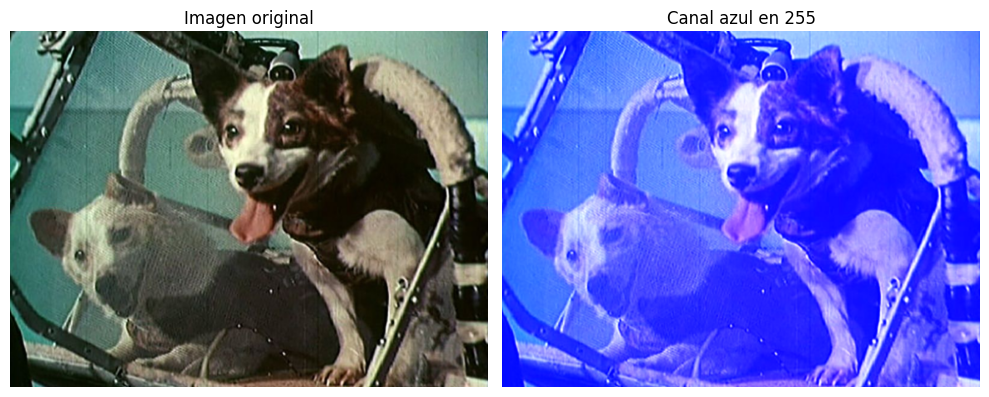

In [5]:
azul_255= belka_strelka_np.copy()
azul_255[:, :, 2] = 255

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(azul_255)
plt.title('Canal azul en 255')
plt.axis('off')

plt.tight_layout()
plt.show()

* al elevar al maximo los valores del canal azul los colores azules ahora son mas azules y las combinaciones que tenian azul cambiaron de color 


5. Calcular la intensidad media de cada banda de color utilizando numpy.mean() sobre los canales respectivos.

In [6]:
intensidad_roja= np.mean(belka_strelka_np[:, :, 0])
intensidad_verde= np.mean(belka_strelka_np[:, :, 1])
intensidad_azul= np.mean(belka_strelka_np[:, :, 2])

print(f"Intensidad media - Rojo: {intensidad_roja:.2f}, Verde: {intensidad_verde:.2f}, Azul: {intensidad_azul:.2f}")


Intensidad media - Rojo: 82.42, Verde: 91.03, Azul: 77.02


6. Aumentar la el brillo de cada canal, multiplicando sus respectivos valores por un factor que eleve la intensidad promedio
 de cada canal en un 20%. Aplicar este ajuste a cada canal de la imagen y graficar la imagen a color resultante. Comente
 sobre las diferencias observadas con respecto a la imagen original.

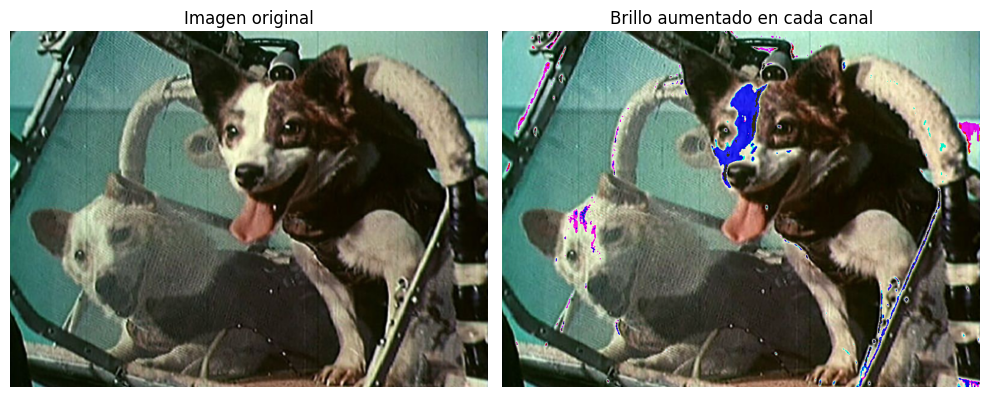

In [7]:
imagen_aumentada = belka_strelka_np.copy()
imagen_aumentada[:, :, 0] = belka_strelka_np[:, :, 0] * 1.2
imagen_aumentada[:, :, 1] = belka_strelka_np[:, :, 1] * 1.2
imagen_aumentada[:, :, 2] = belka_strelka_np[:, :, 2] * 1.2

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_aumentada)
plt.title('Brillo aumentado en cada canal')
plt.axis('off')

plt.tight_layout()
plt.show()

* ahora cada canal es un 20% mas intenso esto probocó que algunos pixeles se saturaran haciendo que algo de la información de la imagen se perdiera

 7. Repetir el ajuste de intensidad utilizando un único valor medio calculado para los tres canales RGB, de modo que la inten
sidad promedio de sus pixeles sea un 20% mayor al de la imagen original. Este paso centraliza el ajuste de brillo basado en
 la intensidad global promedio. Mostrar la imagen ajustada y compararla con la versión que tiene ajustes individuales por
 canal. Comente sobre cualquier diferencia resultante de hacer el ajuste de brillo a una imagen de de manera uniforme en
 sus 3 canales en comparación a realizar el ajuste por canal individual.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


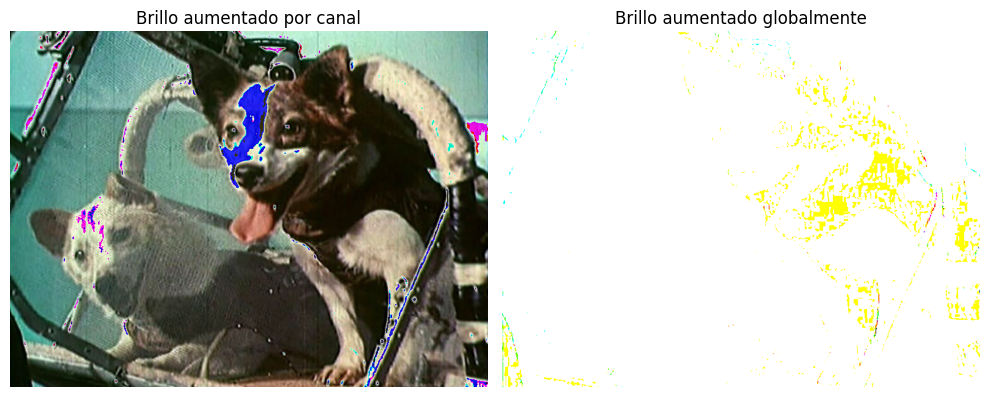

In [8]:
mean_global = np.mean(belka_strelka_np)
new_mean_global = mean_global * 1.2
factor_global = new_mean_global / mean_global
img_rgb_bright_global =belka_strelka_np * factor_global

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(imagen_aumentada)
plt.title('Brillo aumentado por canal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_bright_global)
plt.title('Brillo aumentado globalmente')
plt.axis('off')

plt.tight_layout()
plt.show()

* En la primera imagen se ve como unos cuantos pixeles se saturarón, pero en la segunda la gran mayoria de los pixeles se terminaron saturando, aunque el resultado me produce algo de desconfia.

##  3. Segmentación Avanzada por Color

 1. Definir una función segmentar_color_primario(img) que reciba una imagen RGB y produzca una nueva imagen
 donde cada píxel se asigne al color primario (Rojo, Verde o Azul) dominante en ese píxel. Para cada píxel:
 
 
    * Determinar el canal (R, G o B) con el valor más alto.


    * Asignar al píxel en la imagen resultante el valor máximo (255) en ese canal y 0 en los otros dos canales.


Graficar la imagen resultante junto a la imagen original y comentar sobre las observaciones.


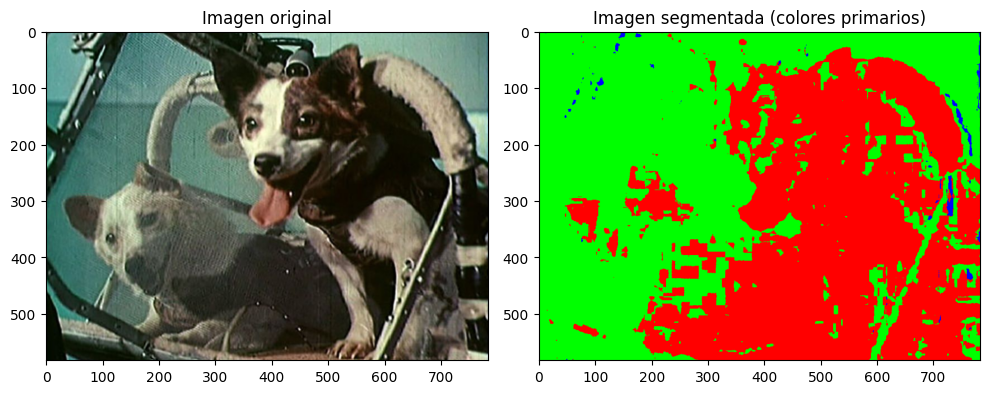

In [9]:
def segmentar_color_primario(img):
    img_np = np.array(img)
    
    img_segmentada = np.zeros_like(img_np)
    
    max_channel = np.argmax(img_np, axis=2)
    
    img_segmentada[max_channel == 0] = [255, 0, 0]  
    img_segmentada[max_channel == 1] = [0, 255, 0] 
    img_segmentada[max_channel == 2] = [0, 0, 255] 
    return img_segmentada

ima_germen=segmentar_color_primario(belka_strelka)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')
    
plt.subplot(1, 2, 2)
plt.imshow(ima_germen)
plt.title('Imagen segmentada (colores primarios)')
plt.tight_layout()
plt.show()



* se puede observar como cada pixel fue reemplazado por su respectivo solor domiante, esto permite ver como el color con mayor dominio dentro de la imagen es el color verde.

2. Extender la función anterior para incluir los colores secundarios (Cian, Magenta y Amarillo).Definir una función segmentar_color_secundario(img) que asigne cada píxel al color compuesto por la combinación de los dos canales dominantes. Para cada píxel:

    * Determinar los dos canales con los valores más altos.

    * Asignar al píxel en la imagen resultante el valor máximo (255) en esos dos canales y 0 en el otro canal.
    
 Graficar la imagen resultante y discutir las diferencias con respecto a la segmentación por colores primarios.

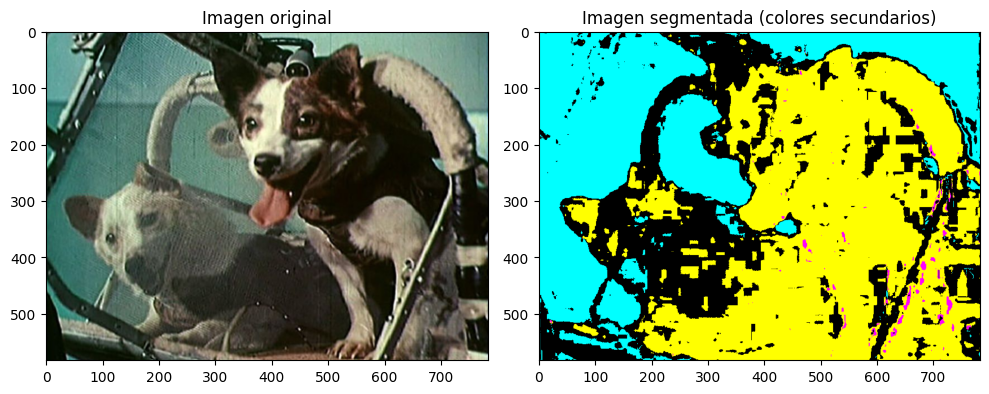

In [10]:
def segmentar_color_secundario(img):
    img_np = np.array(img)
    img_segmentada = np.zeros_like(img_np)

    sorted_channels = np.argsort(img_np, axis=2)
    max1 = sorted_channels[:, :, -1]
    max2 = sorted_channels[:, :, -2]

    img_segmentada[(max1 == 0) & (max2 == 1)] = [255, 255, 0] 
    img_segmentada[(max1 == 1) & (max2 == 2)] = [0, 255, 255]
    img_segmentada[(max1 == 0) & (max2 == 2)] = [255, 0, 255]
    return img_segmentada
    
img_secundaria=segmentar_color_secundario(belka_strelka)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(img_secundaria)
plt.title('Imagen segmentada (colores secundarios)')
plt.tight_layout()
plt.show()


* ahora se puede ver la la nueva iamegen segmentada con colores secundarios, ahora se como los colores de los pixeles que no cumplen la condicion de la función se vuelven cero y como el color dominante ahora es el como cyan.

 3. Ampliar la función anterior para incluir el color blanco. Definir una función segmentar_colores_RGBW(img) que
 asigne un píxel al color blanco si los tres canales tienen valores altos (por encima de un umbral definido). Para cada píxel:

    * Si los tres canales tienen valores mayores o iguales al umbral (por ejemplo, 200), asignar al píxel el 
    valor máximo en todos los canales (blanco).

    * En caso contrario, seguir la lógica de segmentar_color_secundario(img).
    
Graficar la imagen resultante y comentar sobre las áreas que se asignaron al color blanco.

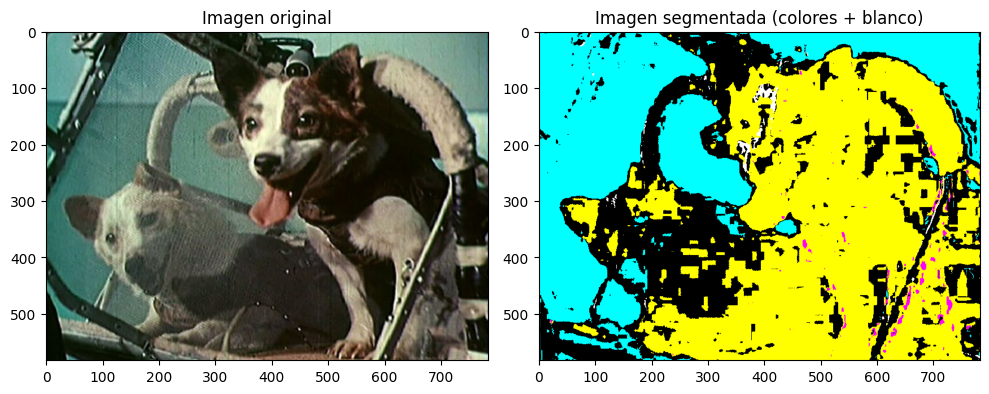

In [11]:
def segmentar_colores_RGBW(img, umbral=200):
    img_np = np.array(img)
    img_segmentada = np.zeros_like(img_np)

    blancos = np.all(img_np >= umbral, axis=2)
    
    sorted_channels = np.argsort(img_np, axis=2)
    max1 = sorted_channels[:, :, -1]
    max2 = sorted_channels[:, :, -2]

    img_segmentada[blancos] = [255, 255, 255]
    img_segmentada[(max1 == 0) & (max2 == 1)] = [255, 255, 0]
    img_segmentada[(max1 == 1) & (max2 == 2)] = [0, 255, 255] 
    img_segmentada[(max1 == 0) & (max2 == 2)] = [255, 0, 255] 
    return img_segmentada

imagenRGBW=segmentar_colores_RGBW(belka_strelka)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(imagenRGBW)
plt.title('Imagen segmentada (colores + blanco)')
plt.tight_layout()
plt.show()


* en la imagen se puede apareciar como las areas cuyos valores son mayores al umbral designado son blancas lo que significa que  mientras mas bajo sea el valor de umbral mas pixeles blancos tendra la imagen 

4. Definir una función segmentar_colores_CMYKW(img) que asigne cada píxel a uno de los siguientes colores: Cian,
 Magenta, Amarillo, Negro o Blanco, basado en los valores de los canales RGB. Para cada píxel:

    * Calcular el valor promedio de los canales RGB.

    * Si los tres canales tienen valores menores o iguales a un umbral bajo (por ejemplo, 50), asignar al píxel el valor 0 en
 todos los canales (negro).

    * Si los tres canales tienen valores mayores o iguales a un umbral alto (por ejemplo, 200), asignar al píxel el valor
 máximo en todos los canales (blanco).

    * Si ningun a de las condiciones anteriores se cumple, asignar el píxel al color secundario correspondiente(Cian,Magen
ta o Amarillo) basado en los dos canales con valores más altos, similar a segmentar_color_secundario(img).

Graficar la imagen resultante y discutir sobre cómo se han segmentado las diferentes áreas de la imagen.

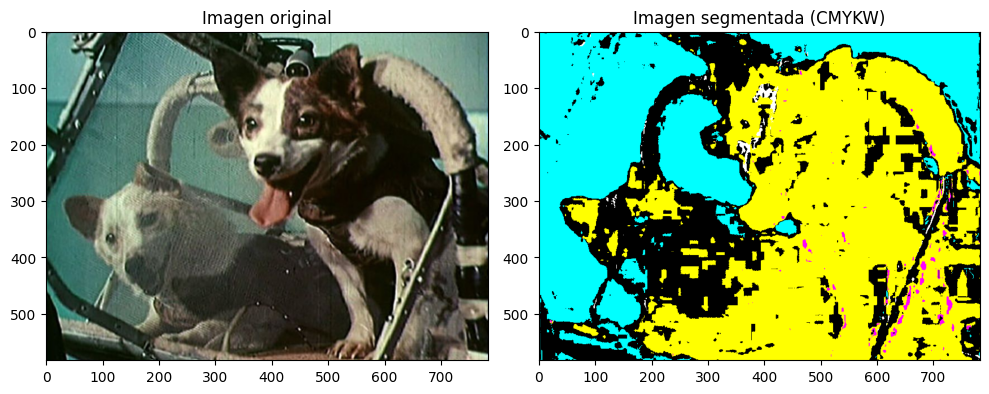

In [12]:
def segmentar_colores_CMYKW(img, umbral_bajo=50, umbral_alto=200):
    img_np = np.array(img)
    img_segmentada = np.zeros_like(img_np)

    negros = np.all(img_np <= umbral_bajo, axis=2)
 
    blancos = np.all(img_np >= umbral_alto, axis=2)
   
    sorted_channels = np.argsort(img_np, axis=2)
    max1 = sorted_channels[:, :, -1]
    max2 = sorted_channels[:, :, -2]

    img_segmentada[negros] = [0, 0, 0]  
    img_segmentada[blancos] = [255, 255, 255]  
    img_segmentada[(max1 == 0) & (max2 == 1)] = [255, 255, 0]  
    img_segmentada[(max1 == 1) & (max2 == 2)] = [0, 255, 255]  
    img_segmentada[(max1 == 0) & (max2 == 2)] = [255, 0, 255]  
    return img_segmentada

imagencmyk=segmentar_colores_CMYKW(belka_strelka)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(belka_strelka_np)
plt.title('Imagen original')

plt.subplot(1, 2, 2)
plt.imshow(imagencmyk)
plt.title('Imagen segmentada (CMYKW)')
plt.tight_layout()
plt.show()


* se aprecia como se cumple la condición de la función de los colores secundarios, solo que ahora los pixeles blanco y negro se adieren a su umbral en donde a menor umbral para blancos mas pixeles blancos habrá y a mayor umbral para negros mas pixeles negros habrá.

 5. Crear una función crear_histograma_colores(img) que genere un histograma mostrando la cantidad de píxeles
 asignados a cada uno de los colores utilizados en la segmentación (Rojo, Verde, Azul, Cian, Magenta, Amarillo, Negro y
 Blanco). Utilizar esta función para analizar la distribución de colores en las imágenes segmentadas obtenidas en los pasos
 anteriores.

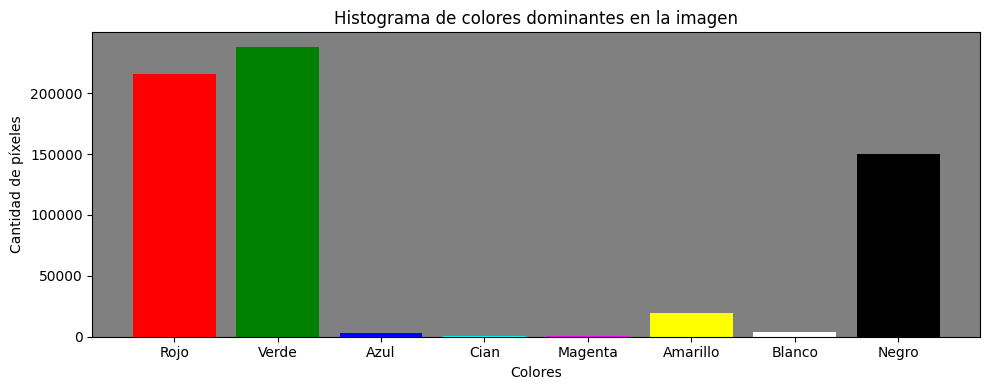

Píxeles Rojo: 215747
Píxeles Verde: 238048
Píxeles Azul: 2694
Píxeles Cian: 797
Píxeles Magenta: 253
Píxeles Amarillo: 19079
Píxeles Blanco: 4139
Píxeles Negro: 150165


In [13]:

def crear_histograma_colores(img, umabral_neg=50, umbral_blanc=200):
    img_np = np.array(img)

    R = img_np[:, :, 0] 
    G = img_np[:, :, 1] 
    B = img_np[:, :, 2]  
    
    canal_dominante = np.argmax(img_np, axis=2)
    
    rojo_dominante = np.sum(canal_dominante == 0)
    verde_dominante = np.sum(canal_dominante == 1)
    azul_dominante = np.sum(canal_dominante == 2)
    
    cian = ((G >= R) & (G >= B)) & ((B >= R) & (B >= G))
    magenta = ((R >= G) & (R >= B)) & ((B >= G) & (B >= R))
    amarillo = ((R >= G) & (R >= B)) & ((G >= R) & (G >= B))
    
    cian_dominante = np.sum(cian)
    magenta_dominante = np.sum(magenta)
    amarillo_dominante = np.sum(amarillo)

    umbral_alto = umbral_blanc
    umbral_bajo = umabral_neg
    
    blanco = np.all(img_np >= umbral_alto, axis=2)
    blanco_dominante = np.sum(blanco)
    
    negro = np.all(img_np <= umbral_bajo, axis=2)
    negro_dominante = np.sum(negro)
    
    colores = ['Rojo', 'Verde', 'Azul', 'Cian', 'Magenta', 'Amarillo', 'Blanco', 'Negro']
    cantidad_pixeles = [
        rojo_dominante, 
        verde_dominante, 
        azul_dominante, 
        cian_dominante, 
        magenta_dominante, 
        amarillo_dominante, 
        blanco_dominante, 
        negro_dominante]

    plt.figure(figsize=(10, 4))
    plt.bar(colores, cantidad_pixeles, color=['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'white', 'black'])
    plt.xlabel('Colores')
    plt.ylabel('Cantidad de píxeles')
    plt.title('Histograma de colores dominantes en la imagen')
    plt.gca().set_facecolor('gray')
    plt.tight_layout()
    plt.show()
    
    for color, cantidad in zip(colores, cantidad_pixeles):
        print(f'Píxeles {color}: {cantidad}')
    return


crear_histograma_colores(belka_strelka)


6. Comentar sobre las aplicaciones prácticas de la segmentación por color en áreas como visión artificial, procesamiento de
 imágenes médicas o robótica. Discuta cómo la segmentación por colores primarios y secundarios puede ser útil en tareas
 de reconocimiento o seguimiento de objetos.

* En estas áreas la visión artificial tiene múltiples aplicaciones como el reconocimiento de objetivos, de personas en base a su vestimenta, el reconocimiento de anomalías medicas, el análisis de exámenes médicos y es que la esta segmentación por colores nos permite observar visualmente cosas que de manera más fácil y ayuda a detectar eventuales problemas de manera mas eficiente, los colores primarios y secundarios ayudan a segmentar aquellas regiones de interés que pueden surgir en una imagen haciendo incluso más fácil el entrenamiento de algoritmos de aplicación medica o robótica.

##  4. Manipulación y Combinación de Imágenes

1. Cargar nuevamente la imagen original belka-strelka.png y convertirla a escala de grises utilizando la función
 cargar_imagen_gris_np(x) desarrollada en laboratorios anteriores. Normalizar la imagen en escala de grises entre
 0 y 1.

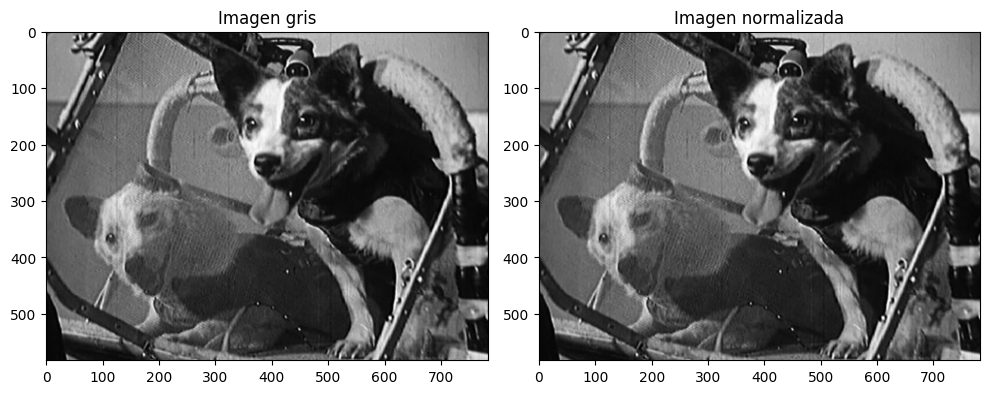

In [14]:
def cargar_imagen_gris_np(x):
    import numpy as np
    from PIL import Image
    imaganen_color=Image.open(rf'{x}')
    imagen_gris= imaganen_color.convert('L')
    imagen_gris=np.array(imagen_gris)/256
    return imagen_gris

def normalizar_imagen(x):
    imanen_norm= (x - np.min(x))/(np.max(x) - np.min(x))
    return imanen_norm

imagen_gris=cargar_imagen_gris_np('belka-strelka.png')

imagen_normalizada=normalizar_imagen(imagen_gris)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_gris,cmap='gray')
plt.title('Imagen gris')

plt.subplot(1, 2, 2)
plt.imshow(imagen_normalizada,cmap='gray')
plt.title('Imagen normalizada')
plt.tight_layout()
plt.show()


2. Crear una imagen binaria a partir de la imagen en escala de grises utilizando un umbral de 0.5. Es decir, asignar a cada
 píxel el valor 1 si su intensidad es mayor o igual a 0.5, y 0 en caso contrario. Esta imagen representará una máscara binaria.

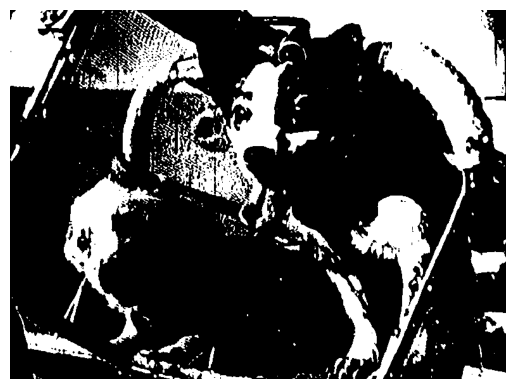

In [16]:
imagen_binaria = np.where(imagen_normalizada>=0.5,1,0)

plt.imshow(imagen_binaria,cmap='gray')
plt.axis('off')
plt.show()

 3. Utilizar la máscara binaria para combinar la imagen original a color y una versión invertida (negativa) de la misma imagen.
 Para ello:

    * Crear la versión invertida de la imagen original a color restando los valores de los píxeles al valor máximo (255).

    * Para cada píxel, si el valor en la máscara es 1, asignar el valor del píxel de la imagen original. Si el valor en la máscara
 es 0, asignar el valor del píxel de la imagen invertida.
 
 Graficar la imagen resultante y comentar sobre el efecto visual obtenido

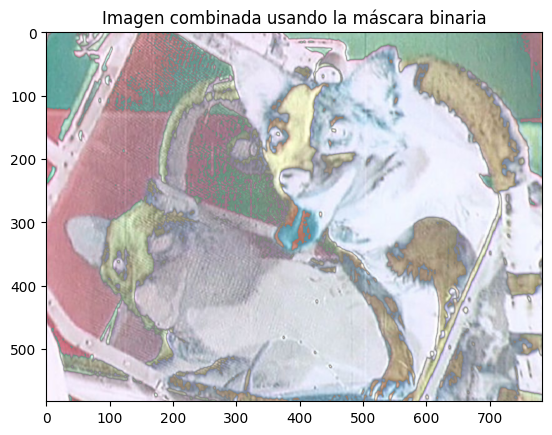

In [20]:
img_invertida = 255 - belka_strelka_np

img_combinada = np.where(imagen_binaria[..., None] == 1, belka_strelka, img_invertida)

plt.imshow(img_combinada)
plt.title('Imagen combinada usando la máscara binaria')
plt.show()


* en la imagen se ve como los pixeles iguales a 1 se mantuvueron igual y los pixeles iguales a cero se inviertieron visualmente parece el efecto sepia que tenian los celulares antiguos.

4. Implementar unafunción fusionar_imagenes(img1, img2, alpha)quecombinedosimágenesacolordeigual
 tamaño utilizando una interpolación lineal controlada por un factor 𝛼 entre 0 y 1:
 $$
\text{img\_fusionada} = \alpha \cdot \text{img1} + (1 - \alpha) \cdot \text{img2}
$$

Utilizar esta función para fusionar la imagen original con su versión invertida, variando 𝛼 en valores de 0, 0.25, 0.5, 0.75 y
Graficar las imágenes resultantes y discutir cómo el valor de 𝛼 afecta la combinación de las imágenes.

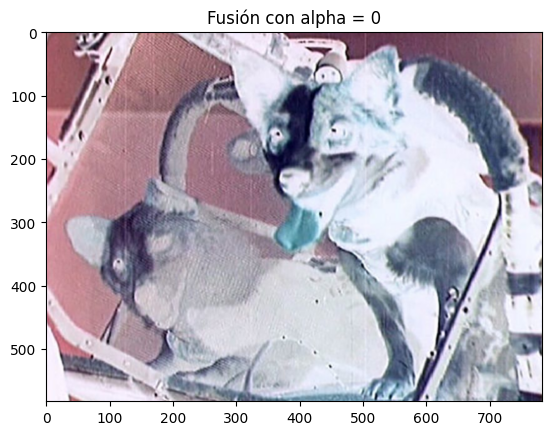

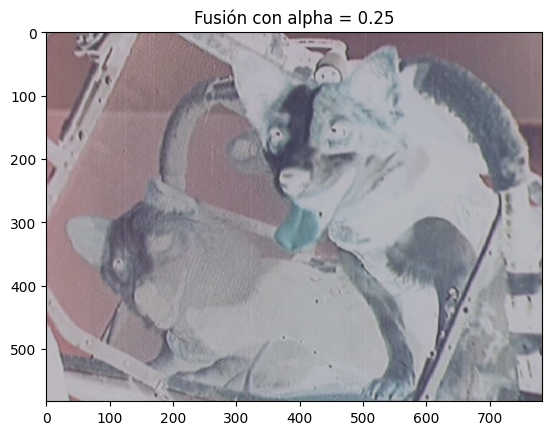

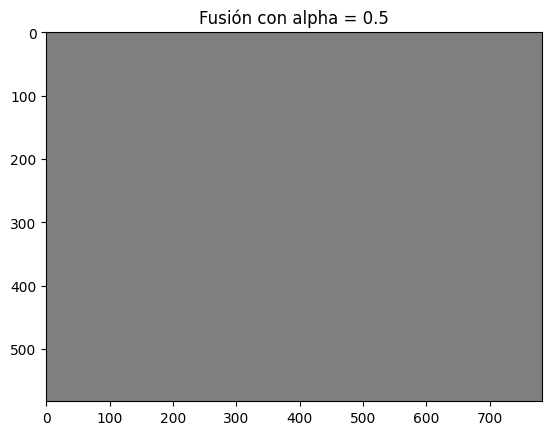

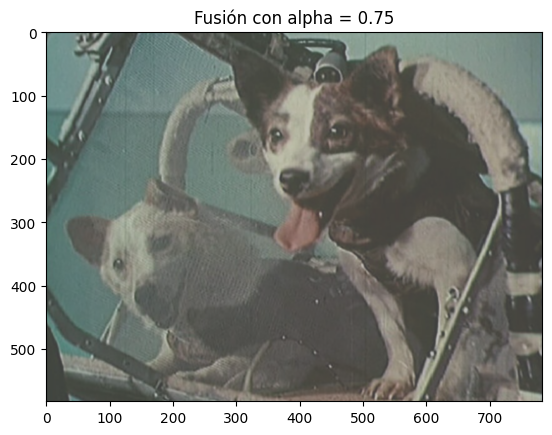

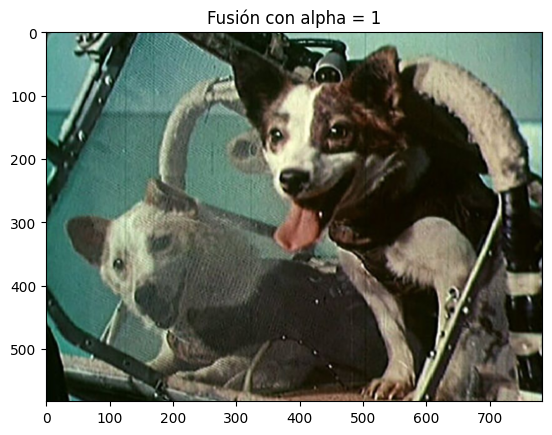

In [21]:

def fusionar_imagenes(img1, img2, alpha):
    img_fusionada = (alpha * img1 + (1 - alpha) * img2).astype(np.uint8)
    return img_fusionada

alphas = [0, 0.25, 0.5, 0.75, 1]
for alpha in alphas:
    img_fusionada = fusionar_imagenes(belka_strelka_np, img_invertida, alpha)
    plt.imshow(img_fusionada)
    plt.title(f'Fusión con alpha = {alpha}')
    plt.show()

* se puede apreciar como la imagen hace una transición desde su posicion invertida hasta su posición normal a medida que el valor de alpha se acerca a 1 según investigue esto es muy útil en efectos de morphing o en la creación de transiciones suaves en video o fotografía.

 5. Explorar el usodediferentes máscaras para combinar imágenes. Por ejemplo, crear una máscara circular o una máscaracon
 un gradiente de valores entre 0 y 1, y utilizarla para combinar la imagen original con otra imagen (puede ser una imagen
 de su elección o la imagen invertida). Graficar los resultados y comentar sobre las aplicaciones de estas técnicas en efectos
 visuales y procesamiento de imágenes

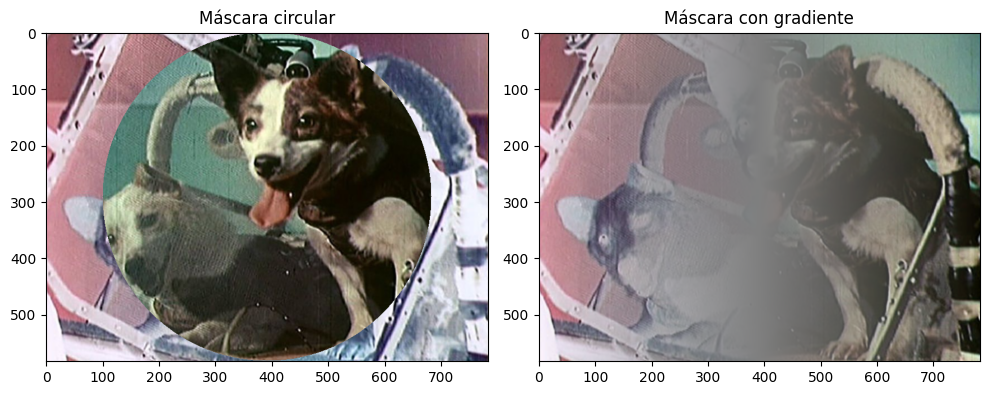

In [27]:

h, w, _ = belka_strelka_np.shape
y, x = np.ogrid[:h, :w]
centro_x, centro_y = w // 2, h // 2
radio = min(centro_x, centro_y)
mascara_circular = (x - centro_x)**2 + (y - centro_y)**2 <= radio**2

img_circular = np.where(mascara_circular[..., None], belka_strelka_np, img_invertida)

gradiente = np.linspace(0, 1, w)
mascara_gradiente = np.tile(gradiente, (h, 1))

img_gradiente = (mascara_gradiente[..., None] * belka_strelka_np + (1 - mascara_gradiente[..., None]) * img_invertida).astype(np.uint8)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_circular)
plt.title('Máscara circular')
plt.subplot(1,2,2)
plt.imshow(img_gradiente)
plt.title('Máscara con gradiente')
plt.tight_layout()
plt.show()


* la mascara circular es un tipo de mascara en el que se aprecia como solo los pixeles de la zona interna del cuadro conservan su valor original y los demas se invierten esto puede resultar util en la creación de viñetas y para centrar la atencion en un punto.

* mientras que el efecto de gradiente da un transición visual mas suabe entre imagenes esto puede ser util para crear el efecto de fundición entre imagenes.